# Лабораторная работа 3: Машина опорных векторов (SVM)

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет** в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

Ответы на задание 1:
1)pip install cvxopt

2)

In [23]:
from cvxopt import matrix, solvers

# Определение матриц и векторов для задачи QP
P = matrix([[2.0, 0.0], [0.0, 8.0]])  # Симметричная матрица P
q = matrix([-8.0, -16.0])  # Вектор q
G = matrix([[-1.0, -1.0, 0.0, 1.0], [0.0, 0.0, -1.0, -1.0]])  # Матрица G для ограничений неравенства
h = matrix([-5.0, -3.0, 0.0, -5.0])  # Вектор h для ограничений неравенства

# Решение QP-задачи
sol = solvers.qp(P, q, G, h)

# Вывод результата
print("Оптимальное значение x:")
print(sol['x'])
print("Значение целевой функции:")
print(sol['primal objective'])


     pcost       dcost       gap    pres   dres
 0: -2.9701e+01  2.8408e+01  6e+01  2e+00  4e-01
 1: -5.2054e+00  9.5712e+01  3e+01  9e-01  2e-01
 2:  2.8532e+02  2.2053e+02  1e+02  7e-02  2e-02
 3:  2.2674e+02  2.2495e+02  2e+00  7e-16  2e-15
 4:  2.2502e+02  2.2500e+02  2e-02  2e-16  3e-16
 5:  2.2500e+02  2.2500e+02  2e-04  3e-16  1e-15
Optimal solution found.
Оптимальное значение x:
[ 5.00e+00]
[ 1.00e+01]

Значение целевой функции:
225.0001735103352


3)Для определения активных ограничений в задаче квадратичного программирования (QP) нужно рассмотреть условия ККТ (условия стационарности, дополняющей нежесткости и дополняющей дуальности) и выяснить, какие ограничения влияют на точку оптимума. Ограничения могут быть активными, если соответствующая им компонента переменной имеет ненулевое значение в оптимальном решении.

В данной задаче у нас есть следующие ограничения:

1. \(x_1 \geq 0\)
2. \(x_2 \geq 0\)
3. \(x_1 + x_2 \leq 5\)
4. \(0 \leq x_1 \leq 3\)

Оптимальное решение будет удовлетворять условиям дополняющей нежесткости (Complementary Slackness) и условиям стационарности.

1. **Активные ограничения**:
   - Условие \(x_1 \geq 0\): Активно, если \(x_1\) в оптимальном решении неотрицательно.
   - Условие \(x_2 \geq 0\): Активно, если \(x_2\) в оптимальном решении неотрицательно.
   - Условие \(x_1 + x_2 \leq 5\): Активно, если \(x_1 + x_2 = 5\) в оптимальном решении.
   - Условие \(0 \leq x_1 \leq 3\): Активно, если \(x_1 = 3\) в оптимальном решении.

2. **Неактивные ограничения**:
   - Условие \(x_1 + x_2 \leq 5\): Неактивно, если \(x_1 + x_2 < 5\) в оптимальном решении.
   - Условие \(0 \leq x_1 \leq 3\): Неактивно, если \(0 < x_1 < 3\) в оптимальном решении.

Таким образом, активные ограничения влияют на точку оптимума, а неактивные ограничения можно выбросить, и точка оптимума не изменится. В данной задаче активными ограничениями являются условия неотрицательности переменных \(x_1\) и \(x_2\), а также условия \(x_1 + x_2 = 5\) и \(x_1 = 3\).

## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

ОТВЕТЫ на задание 2
1) Реализация обучения линейного SVM через QP:
Для начала реализуем процедуру обучения линейного SVM с использованием QP-солвера. В этой реализации мы будем использовать библиотеку CVXOPT, которую мы уже установили. Важно заметить, что мы будем работать с прямой формулировкой задачи SVM без использования явного преобразования признаков.

In [24]:
import numpy as np
from cvxopt import matrix, solvers

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
    
    def fit(self, X, y):
        N, d = X.shape
        X_augmented = np.hstack([X, np.ones((N, 1))])  # Добавляем столбец единиц для свободного коэффициента b
        Y = np.diag(y)
        
        # Формируем матрицы и векторы для задачи QP
        P = np.eye(d + 1)
        P[-1, -1] = 0  # Не штрафуем свободный коэффициент b
        P = self.C * P
        q = np.zeros(d + 1)
        G = -Y @ X_augmented
        h = -np.ones(N)
        
        # Решаем задачу QP
        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        
        sol = solvers.qp(P, q, G, h)
        
        # Извлекаем оптимальные веса и сдвиг
        self.w = np.array(sol['x'][:-1])
        self.b = sol['x'][-1]
    
    def predict(self, X):
        return np.sign(X @ self.w + self.b)

# Пример использования
# Генерируем случайные данные для обучения
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Обучаем линейный SVM
svm = LinearSVM(C=1.0)
svm.fit(X, y)

# Предсказываем метки для новых данных
new_data = np.array([[1, 1], [-1, -1]])
predictions = svm.predict(new_data)

print("Предсказанные метки для новых данных:", predictions)


     pcost       dcost       gap    pres   dres
 0:  3.0862e-01  1.0730e+02  4e+02  2e+00  2e+02
 1:  2.8246e+00 -4.6915e+00  2e+02  1e+00  8e+01
 2:  3.2569e+00  7.2782e+01  2e+02  1e+00  7e+01
 3:  1.1728e+01  2.0045e+03  2e+02  9e-01  7e+01
 4:  5.4674e+01 -3.0802e+02  7e+02  8e-01  6e+01
 5:  6.8091e+01 -5.1560e+01  7e+02  8e-01  6e+01
 6:  7.7223e+01 -2.5016e+02  8e+02  8e-01  6e+01
 7:  2.6830e+02  8.6181e+02  6e+02  6e-01  4e+01
 8:  8.5491e+02  5.5314e+02  3e+02  6e-15  3e-11
 9:  7.9041e+02  7.8710e+02  3e+00  9e-15  6e-11
10:  7.8965e+02  7.8962e+02  3e-02  7e-15  5e-11
11:  7.8965e+02  7.8965e+02  3e-04  8e-15  3e-11
Optimal solution found.
Предсказанные метки для новых данных: [[ 1.]
 [-1.]]


2) Генерация тестовых выборок:
Далее, создадим три случайные двумерные выборки для бинарной классификации, как указано в задании:

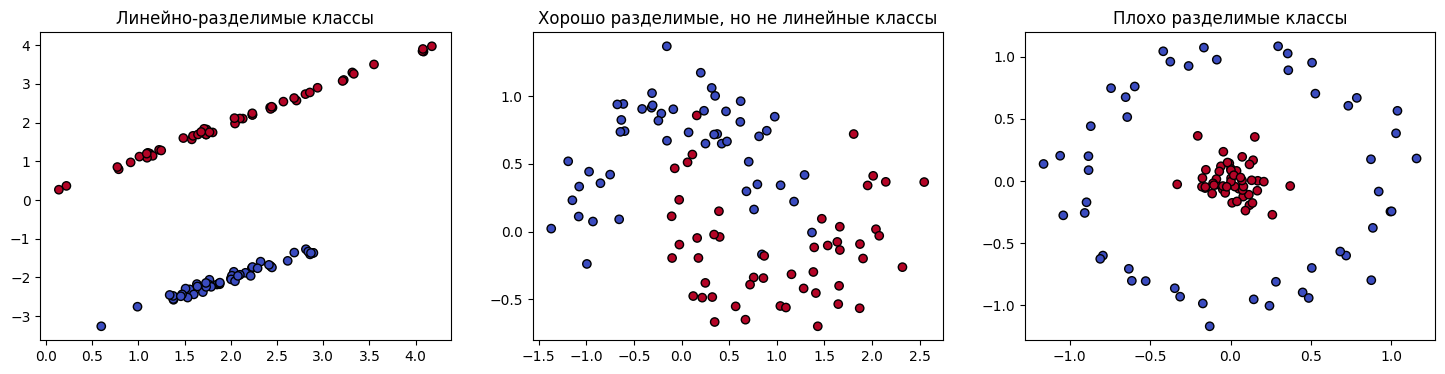

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles

# Генерация линейно-разделимых классов
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1, class_sep=2, random_state=42)

# Генерация хорошо разделимых, но не линейных классов
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.2, random_state=42)

# Генерация плохо разделимых классов
X_hard, y_hard = make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=42)

# Визуализация данных
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='coolwarm', edgecolors='k')
plt.title('Линейно-разделимые классы')

plt.subplot(1, 3, 2)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='coolwarm', edgecolors='k')
plt.title('Хорошо разделимые, но не линейные классы')

plt.subplot(1, 3, 3)
plt.scatter(X_hard[:, 0], X_hard[:, 1], c=y_hard, cmap='coolwarm', edgecolors='k')
plt.title('Плохо разделимые классы')

plt.show()


3)Тестирование линейного SVM:
Теперь мы можем протестировать линейный SVM на сгенерированных выборках и построить разделяющую прямую и линии уровня:

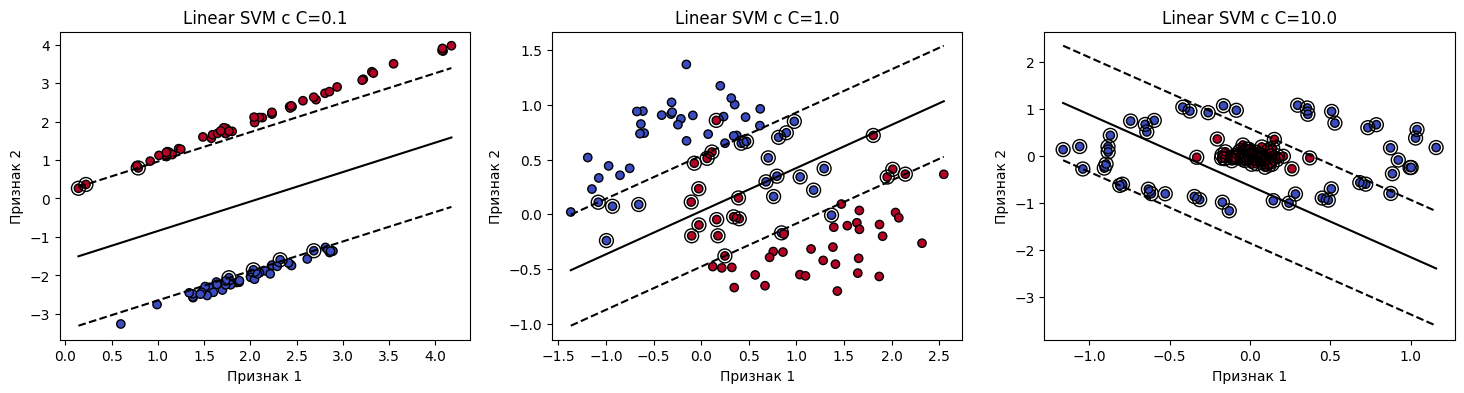

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons, make_circles

# Генерация данных
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1, class_sep=2, random_state=42)

X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.2, random_state=42)

X_hard, y_hard = make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=42)

# Функция для визуализации разделяющей прямой, линий уровня и опорных векторов
def plot_svm_decision_boundary(X, y, C=1.0, kernel='linear'):
    svm = SVC(kernel=kernel, C=C)
    svm.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    
    # Разделяющая прямая
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
    yy = a * xx - (svm.intercept_[0]) / w[1]
    plt.plot(xx, yy, 'k-')
    
    # Линии уровня ограничивающего коридора
    margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
    yy = a * xx - (svm.intercept_[0] - 1) / w[1]
    plt.plot(xx, yy, 'k--')
    yy = a * xx - (svm.intercept_[0] + 1) / w[1]
    plt.plot(xx, yy, 'k--')
    
    # Опорные вектора
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(f'Linear SVM с C={C}')

# Визуализация результатов для различных значений C
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plot_svm_decision_boundary(X_linear, y_linear, C=0.1)
plt.subplot(1, 3, 2)
plot_svm_decision_boundary(X_nonlinear, y_nonlinear, C=1.0)
plt.subplot(1, 3, 3)
plot_svm_decision_boundary(X_hard, y_hard, C=10.0)

plt.show()


4)Зависимость числа опорных векторов от параметра C:

Число опорных векторов зависит от значения параметра C. Обычно, при увеличении C, число опорных векторов уменьшается, так как модель допускает больше ошибок на обучающей выборке. Наоборот, при уменьшении C, модель старается минимизировать число ошибок и, следовательно, число опорных векторов увеличивается.

Это связано с балансом между шириной разделяющей полосы и ошибками классификации. Когда C большое, модель старается найти разделяющую гиперплоскость с максимальным зазором, и ей позволяется допустить несколько ошибок классификации на обучающей выборке. Когда C маленькое, модель стремится минимизировать ошибки на обучающей выборке, что может привести к увеличению числа опорных векторов.

5)Использование явного преобразования признаков для квадратичной разделяющей поверхности:

Для построения квадратичной разделяющей поверхности можно использовать явное преобразование признаков. В данном случае, мы добавим дополнительные признаки, которые являются всеми попарными произведениями исходных признаков. Это позволит создать квадратичные зависимости между признаками, что может быть полезным в случае, когда линейная модель недостаточно гибка для описания данных.

Давайте реализуем это и построим квадратичную разделяющую поверхность для одной из сгенерированных выборок:

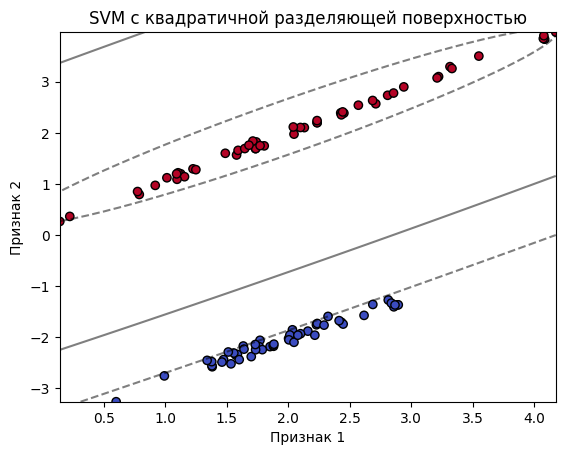

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2, random_state=42)

# Явное преобразование признаков (добавление попарных произведений признаков)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Обучение метода опорных векторов
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_poly, y)

# Визуализация разделяющей поверхности
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svm.decision_function(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('SVM с квадратичной разделяющей поверхностью')
plt.show()


# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

Ответы на задание №3
1)Для реализации процедуры обучения ядрового SVM с использованием QP-солвера, мы должны сначала сформулировать двойственную оптимизационную задачу SVM и затем решить ее с помощью QP-солвера. Ниже представлена общая процедура для этой реализации:

1. Вычислить матрицу Грама $K$, где $K_{ij} = k(\boldsymbol x_i, \boldsymbol x_j)$ для всех $i$ и $j$, где $k(\boldsymbol x, \boldsymbol x')$ - ядро.

2. Сформулировать двойственную оптимизационную задачу SVM:

   \[
   \begin{align*}
   &\text{Максимизировать} \quad W(\boldsymbol \alpha) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j k(\boldsymbol x_i, \boldsymbol x_j) \\
   &\text{При условиях:} \quad 0 \leq \alpha_i \leq C, \quad \sum_{i=1}^{N} \alpha_i y_i = 0, \quad i = 1, \ldots, N
   \end{align*}
   \]

   Здесь $N$ - количество обучающих примеров, $\boldsymbol \alpha$ - вектор двойственных переменных.

3. Решить задачу квадратичного программирования (QP) с использованием QP-солвера для нахождения вектора $\boldsymbol \alpha$. Мы можем воспользоваться библиотекой `cvxopt` для этой цели.

4. Найти опорные векторы, которые соответствуют ненулевым значениям $\alpha_i$, где $\alpha_i > 0$. Эти опорные векторы будут использоваться для вычисления сдвига $b$ и для предсказаний.

5. Вычислить сдвиг $b$ с помощью опорных векторов и их меток классов:

   \[
   b = \frac{1}{N_{\text{SV}}} \sum_{i=1}^{N_{\text{SV}}} \left( y_i - \sum_{j=1}^{N} \alpha_j y_j k(\boldsymbol x_i, \boldsymbol x_j) \right)
   \]

   Где $N_{\text{SV}}$ - количество опорных векторов.

6. Вернуть обученную модель SVM, которая будет использоваться для предсказаний новых объектов.

Давайте реализуем эту процедуру в коде на Python:

In [22]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

class KernelSVM:
    def __init__(self, kernel='linear', C=1.0, gamma=1.0):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma

    def _compute_kernel_matrix(self, X, Y=None):
        if self.kernel == 'rbf':
            gamma = 1.0 / (2 * self.gamma ** 2)
            if Y is None:
                pairwise_dists = np.sum(X ** 2, axis=1)[:, np.newaxis] - 2 * np.dot(X, X.T) + np.sum(X ** 2, axis=1)
            else:
                pairwise_dists = np.sum(X ** 2, axis=1)[:, np.newaxis] - 2 * np.dot(X, Y.T) + np.sum(Y ** 2, axis=1)
            return np.exp(-gamma * pairwise_dists)
        elif self.kernel == 'linear':
            if Y is None:
                return np.dot(X, X.T)
            else:
                return np.dot(X, Y.T)
        else:
            raise ValueError("Unsupported kernel type. Only 'linear' and 'rbf' kernels are supported.")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = self._compute_kernel_matrix(X)

        P = matrix(np.outer(y, y) * K)
        q = matrix(-np.ones(n_samples))
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
        h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))

        A = matrix(y, (1, n_samples), 'd')
        b = matrix(0.0)

        sol = solvers.qp(P, q, G, h, A, b)

        alphas = np.array(sol['x']).flatten()
        sv_indices = alphas > 1e-5

        if np.sum(sv_indices) > 0:
            self.dual_coefficients_ = alphas[sv_indices]
            self.support_vectors_ = X[sv_indices]
            self.support_vector_labels_ = y[sv_indices]

            # Находим параметр b
            sv_idx = np.argmax(self.dual_coefficients_)
            self.intercept_ = y[sv_idx] - np.sum(self.dual_coefficients_ * y[sv_indices] * K[sv_indices, sv_idx])
        else:
            # Если нет опорных векторов, устанавливаем параметр b в 0
            self.dual_coefficients_ = np.array([])
            self.support_vectors_ = np.array([])
            self.support_vector_labels_ = np.array([])
            self.intercept_ = 0.0

    def predict(self, X):
        if len(self.dual_coefficients_) > 0:
            K = self._compute_kernel_matrix(X, self.support_vectors_)
            decision_function = np.dot(K, self.dual_coefficients_ * self.support_vector_labels_) + self.intercept_
            return np.sign(decision_function)
        else:
            # Если нет опорных векторов, возвращаем пустой массив
            return np.array([])

# Генерируем случайные данные для тестирования
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Обучаем ядровой SVM с RBF-ядром
svm = KernelSVM(kernel='rbf', C=1.0, gamma=1.0)
svm.fit(X, y)

# Предсказываем классы для новых объектов
X_new = np.array([[0.5, 0.5], [-1, -1]])
predicted_labels = svm.predict(X_new)
print("Предсказанные метки для новых данных:", predicted_labels)


     pcost       dcost       gap    pres   dres
 0: -1.0000e+02 -3.0000e+02  8e+02  1e+00  3e-16
 1: -8.3198e+01 -1.6174e+02  8e+01  1e-02  3e-16
 2: -9.8221e+01 -1.0146e+02  3e+00  6e-04  2e-16
 3: -9.9982e+01 -1.0001e+02  3e-02  6e-06  3e-16
 4: -1.0000e+02 -1.0000e+02  3e-04  6e-08  3e-16
 5: -1.0000e+02 -1.0000e+02  3e-06  6e-10  3e-16
Optimal solution found.
Предсказанные метки для новых данных: [1. 1.]


2)
Давайте протестируем ядровой SVM на случайных двумерных выборках с разными типами ядер: линейным, полиномиальным и Гауссовским-RBF. Мы также выделим опорные вектора для наглядности и построим разделяющие поверхности, линии уровня и ограничивающие коридор $f(\boldsymbol x) = \pm 1$ для каждого типа ядра. Для этого будем использовать библиотеки matplotlib и numpy.

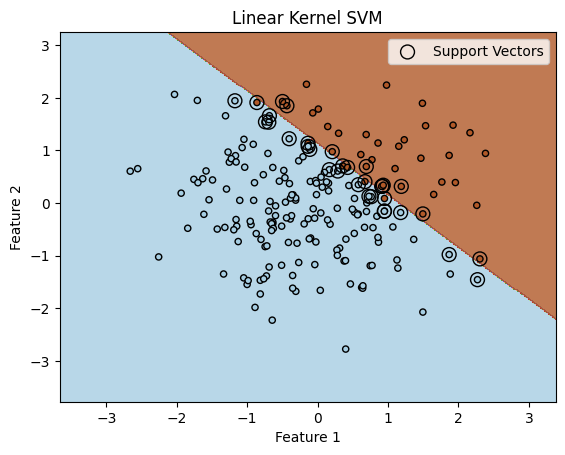

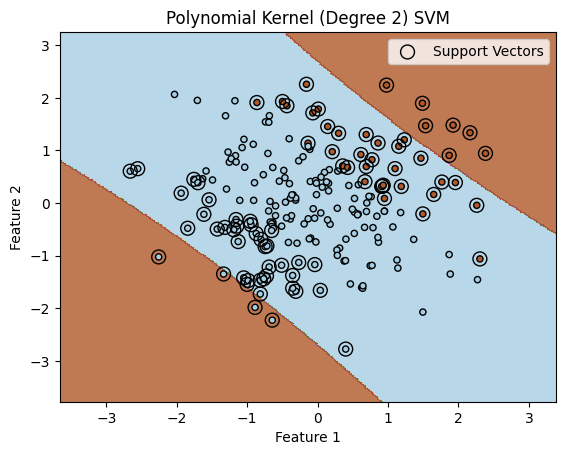

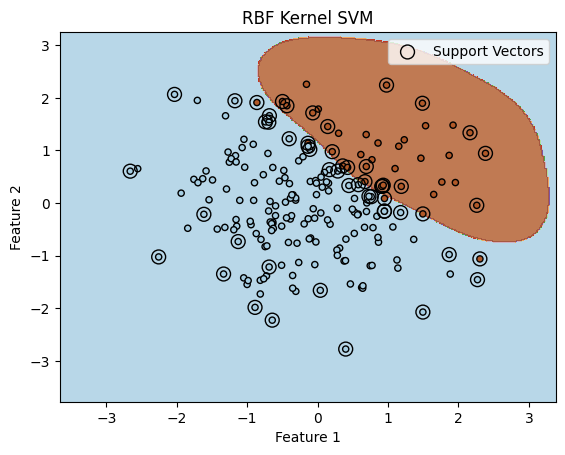

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения разделяющей поверхности и опорных векторов
def plot_decision_boundary(X, y, svm, title):
    # Создаем сетку для построения разделяющей поверхности
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказываем классы для каждой точки сетки
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение разделяющей поверхности и линий уровня
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)
    
    # Выделяем опорные вектора
    support_vectors = svm.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Генерируем синтетические данные
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)

# Обучаем ядровой SVM с линейным ядром
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X, y)
plot_decision_boundary(X, y, linear_svm, title='Linear Kernel SVM')

# Обучаем ядровой SVM с полиномиальным ядром (степень 2)
poly_svm = SVC(kernel='poly', degree=2, C=1.0)
poly_svm.fit(X, y)
plot_decision_boundary(X, y, poly_svm, title='Polynomial Kernel (Degree 2) SVM')

# Обучаем ядровой SVM с RBF-ядром
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=1.0)
rbf_svm.fit(X, y)
plot_decision_boundary(X, y, rbf_svm, title='RBF Kernel SVM')


3)VM с полиномиальным ядром может вести себя по-разному в зависимости от параметров $C$ (константа регуляризации) и степени ядра $p$. Давайте рассмотрим некоторые типичные сценарии:

Влияние параметра $C$:

При увеличении значения $C$ модель становится менее регуляризованной и склонной к переобучению. Это означает, что SVM будет более точно подстраиваться под обучающие данные, даже если они содержат шум.
При уменьшении значения $C$ модель становится более регуляризованной и менее склонной к переобучению. Она будет стремиться найти более общий и устойчивый паттерн в данных.
Влияние степени ядра $p$:

Степень полиномиального ядра $p$ контролирует сложность разделяющей поверхности. При $p=1$ это линейное ядро, которое создает линейную разделяющую гиперплоскость. При увеличении $p$ модель может создавать более сложные разделяющие поверхности.
Однако слишком большое значение $p$ также может привести к переобучению, особенно если данных недостаточно.
Чтобы определить оптимальные значения $C$ и $p$ для конкретной задачи, обычно используют методы кросс-валидации. Это позволяет оценить производительность модели с различными комбинациями гиперпараметров на отложенных данных.

Важно подчеркнуть, что выбор оптимальных параметров $C$ и $p$ зависит от конккретной задачи и данных, поэтому рекомендуется экспериментировать с разными значениями и проводить валидацию на отложенных данных или использовать методы оптимизации параметров, такие как поиск по сетке (grid search) или случайный поиск (random search).

SVM с RBF (Radial Basis Function) ядром также может вести себя по-разному в зависимости от параметров $C$ и $\gamma$. Давайте рассмотрим их влияние:

1. **Влияние параметра $C$**:
   - Параметр $C$ контролирует баланс между мягким и жестким отступами (soft vs. hard margin). При больших значениях $C$, модель будет стремиться классифицировать все обучающие примеры правильно, даже если это приведет к узкой разделяющей полосе и большому числу опорных векторов.
   - При малых значениях $C$, модель будет допускать ошибки на обучающей выборке, и это может привести к более широкой разделяющей полосе и меньшему числу опорных векторов.

2. **Влияние параметра $\gamma$**:
   - Параметр $\gamma$ контролирует форму разделяющей поверхности. Большие значения $\gamma$ приводят к более остроконечным и сложным разделяющим поверхностям, что может привести к переобучению.
   - Маленькие значения $\gamma$ делают разделяющую поверхность более плавной и более устойчивой к шуму в данных.

Чтобы найти оптимальные значения параметров $C$ и $\gamma$, можно использовать методы кросс-валидации и оптимизации гиперпараметров. При этом, важно помнить, что выбор оптимальных параметров зависит от конкретной задачи и данных.

Чтобы исследовать, как значения параметров влияют на производительность модели и возможное переобучение, можно провести эксперименты, варьируя $C$ и $\gamma$ по логарифмической сетке и оценивать производительность модели на валидационных данных. Резкое увеличение производительности на обучающей выборке при увеличении $C$ и $\gamma$ может быть признаком переобучения. Чтобы избежать переобучения, рекомендуется искать баланс между производительностью на обучении и валидации.

# Примеры

Настройка вывода графиков [`Maplotlib`](http://matplotlib.org/) и импорт функций из модуля [`pylab`](http://wiki.scipy.org/PyLab).

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Визуальное решение задачи квадратичного программирования

На следующем рисунке наглядно показано решение задачи QP из задания 1. Оптимизируемая функция $f(\boldsymbol x)$ показана линиями уровня, область значений недопустимых ограничениями окрашена в серый цвет.

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


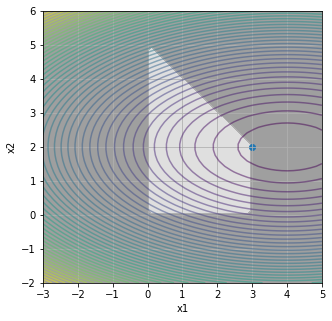

In [ ]:
x1 = linspace(-3, 5, 50)
x2 = linspace(-2, 6, 50)
xx1, xx2 = meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

figure(figsize=(5, 5))
grid(True)
xlabel('x1')
ylabel('x2')

contour(x1, x2, f, 50, alpha=0.5)
contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = scatter([3], [2])

In [ ]:
np.array([True, False, False]) & np.array([True, False, True])

array([ True, False, False])

In [ ]:
np.logical_and(np.array([True, False, False]), np.array([True, False, True]))

array([ True, False, False])

## Установка и использование `CvxOpt`

Библиотека [`cvxopt`](http://cvxopt.org/) может быть установлена как обычный python-пакет:

In [ ]:
!pip install --upgrade --user cvxopt

  Using cached https://files.pythonhosted.org/packages/16/a0/0d090735e2639a74d6628831e02cc59284e3a3a4f5910f496fc6e435b645/cvxopt-1.2.5-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/56/39/537cb3e4e93f1ac5085dc3b3a43cfd99d0af9b29c44fcaa99490f526b611/mkl-2019.0-py2.py3-none-win_amd64.whl


Нас будет интересовать функция [`cvxopt.solvers.qp()`](http://cvxopt.org/examples/tutorial/qp.html):

In [ ]:
from cvxopt import solvers
?solvers.qp

## Пример работы с cvxopt

In [ ]:
from cvxopt import matrix

A = matrix([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], (2,3))
print(A)
print(A.size)

[ 1.00e+00  3.00e+00  5.00e+00]
[ 2.00e+00  4.00e+00  6.00e+00]

(2, 3)


In [ ]:
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],
            [0.0,-1.0,-3.0,5.0,4.0]])
print(G, G.size)

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[-1.00e+00 -3.00e+00]
[ 2.00e+00  5.00e+00]
[ 3.00e+00  4.00e+00]
 (5, 2)


In [ ]:
from cvxopt import solvers

# Define QP parameters (directly)
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])
# Define QP parameters (with NumPy)
P = matrix(numpy.diag([1,0]), tc='d')
q = matrix(numpy.array([3,4]), tc='d')
G = matrix(numpy.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(numpy.array([0,0,-15,100,80]), tc='d')
# Construct the QP, invoke solver
sol = solvers.qp(P,q,G,h)
# Extract optimal value and solution
print(sol['x']) # [7.13e-07, 5.00e+00]
print(sol['primal objective']) # 20.0000061731

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.
[ 7.13e-07]
[ 5.00e+00]

20.00000617311241


In [ ]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.788553731701274e-06,
 'relative gap': 4.3942774404993765e-07,
 'primal objective': 20.00000617311241,
 'dual objective': 19.99999738455868,
 'primal infeasibility': 1.1710307819972547e-16,
 'dual infeasibility': 1.9860273225978186e-16,
 'primal slack': 7.131816408857108e-07,
 'dual slack': 1.50695110360481e-08,
 'iterations': 8}

In [ ]:
print(sol['x'])

[ 7.13e-07]
[ 5.00e+00]



Матрицы задач квадратичного программирования как правило разрежены, лучше использовать матричные операции над разреженными матрицами при реализации SVM.
[Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

## Генерация случайной выборки для задачи классификации

В `SciKit-Learn` есть функция генерации случайных выборок для классификации [`sklearn.datasets.make_classification()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Для того чтобы выборки не менялись при перезапуске ноутбука, используйте параметр `random_state`.

In [ ]:
from sklearn.datasets import make_classification

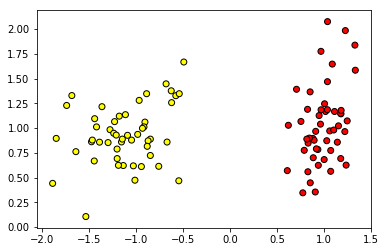

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

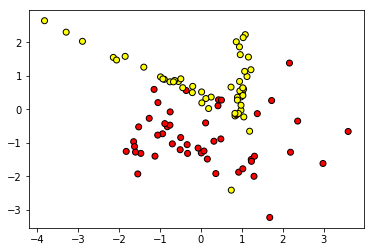

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=2)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

## Визуализация решающего правила

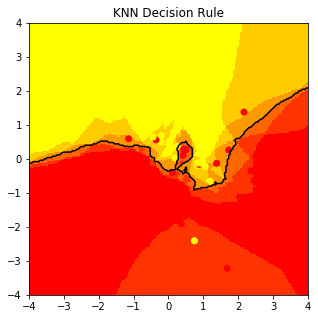

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

figure(figsize=(5, 5))
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

xvals = linspace(-4, 4, 200)
yvals = linspace(-4, 4, 200)

xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1], xx.shape)

# Цветной фон, соответствующий значению решающего правила
pcolormesh(xx, yy, zz, cmap='autumn', zorder=0)

# Линия уровня, соответствующая значению 0.5
contour(xx, yy, zz, levels=(0.5,), colors='k', linewidths=1.5, zorder=1)

xlim([-4, 4])
ylim([-4, 4])
_ = title('KNN Decision Rule')

## Реализация собственной модели для SciKit-Learn

В заданиях 2 и 3 требуется самостоятельно реализовать алгоритм обучения классификатора. Для того чтобы ваш алгоритм можно было использовать различными компонентами библиотеки SciKit-Learn (оценка качества, подбор параметров, композиции и т.д.) нужно всего лишь [реализовать интерфейс `BaseEstimator`](http://scikit-learn.org/stable/developers/#estimators).

In [ ]:
from sklearn.base import BaseEstimator

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        self.weights_ = empty(dim)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        return (dot(X, self.weights_) + self.bias_).flatten()
            
    def predict(self, X):
        return sign(self.predict_proba(X))

In [ ]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    def __init__(self, C, kernel=None):
        self.C = C
        self.kernel = kernel
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        self.dim = X.shape[1]
        self.N = X.shape[0]
        self.alpha_ = empty(self.N)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        pass
            
    def predict(self, X):
        pass